In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.5'
}
#headers = {'Accept-Language': 'en-US,en;q=0.5'}
response = requests.get("https://www.imdb.com/chart/top", headers=headers)
html_content = response.content

mysoup = BeautifulSoup(html_content, 'html.parser')
table = mysoup.find('tbody', {'class': 'lister-list'})
movies = table.find_all('tr')
movie_data = []

for idx, movie in enumerate(movies):
    title = movie.find('td', {'class': 'titleColumn'}).a.text
    year = movie.find('td', {'class': 'titleColumn'}).span.text.strip('()')
    starring_and_director = movie.find('td', {'class': 'titleColumn'}).a['title']
    director = re.search(r"^(.*?)(?=\s+\(dir\.\))", starring_and_director).group(1)
    starring = re.search(r"(?<=\(dir\.\),\s)(.*)$", starring_and_director).group(1)
    rating = float(movie.find('td', {'class': 'ratingColumn imdbRating'}).strong.text)
    users_rating = float(movie.find('td', {'class': 'ratingColumn imdbRating'}).strong['title'].split()[-3].replace(',', ''))
    links = "https://www.imdb.com" + movie.find('td', {'class': 'titleColumn'}).a['href']
    
    # Scrape the movie type
    response1 = requests.get(links, headers=headers)
    html_content1 = response1.content
    soup = BeautifulSoup(html_content1, 'html.parser')
    genre_elems = soup.find_all('a', {'class': 'ipc-chip ipc-chip--on-baseAlt'})
    genre = ', '.join([g.span.text.strip('[]') for g in genre_elems])

        
    movie_data.append({
        'id': idx+1,
        'title': title, 
        'year': year, 
        'rating': rating, 
        'links': links, 
        'users_rating': users_rating, 
        'director': director, 
        'starring': starring, 
        'genre': genre
    })

df_movies = pd.DataFrame(movie_data)
df_movies.to_csv('top_250_movies.csv', index=False)


In [30]:
df_duplicate = df_movie_type.copy()
df_duplicate.to_csv('top_250_movies_backup.csv', index=False)


In [31]:

print(df_movies)

      id                     title  year  rating  \
0      1  The Shawshank Redemption  1994     9.2   
1      2             The Godfather  1972     9.2   
2      3           The Dark Knight  2008     9.0   
3      4     The Godfather Part II  1974     9.0   
4      5              12 Angry Men  1957     9.0   
..   ...                       ...   ...     ...   
245  246             Life of Brian  1979     8.0   
246  247            The Iron Giant  1999     8.0   
247  248                  The Help  2011     8.0   
248  249                   Aladdin  1992     8.0   
249  250        Dances with Wolves  1990     8.0   

                                                 links  users_rating  \
0    https://www.imdb.com/title/tt0111161/?pf_rd_m=...     2736892.0   
1    https://www.imdb.com/title/tt0068646/?pf_rd_m=...     1903274.0   
2    https://www.imdb.com/title/tt0468569/?pf_rd_m=...     2710035.0   
3    https://www.imdb.com/title/tt0071562/?pf_rd_m=...     1297311.0   
4    https://ww

In [32]:
print(df_movies['title'])
print(df_movies['genre'])

0      The Shawshank Redemption
1                 The Godfather
2               The Dark Knight
3         The Godfather Part II
4                  12 Angry Men
                 ...           
245               Life of Brian
246              The Iron Giant
247                    The Help
248                     Aladdin
249          Dances with Wolves
Name: title, Length: 250, dtype: object
0                             Drama
1                      Crime, Drama
2              Action, Crime, Drama
3                      Crime, Drama
4                      Crime, Drama
                   ...             
245                          Comedy
246    Animation, Action, Adventure
247                           Drama
248    Animation, Adventure, Comedy
249       Adventure, Drama, Western
Name: genre, Length: 250, dtype: object


In [37]:
# creating a genre table with other features
import pandas as pd

# Create an empty dictionary to hold the data for the new DataFrame
movie_type = ['Drama', 'Crime', 'Action', 'Biography', 'Adventure', 'Comedy', 'Animation', 'Horror',
          'Western', 'Mystery', 'Film-Noir', 'Romance', 'Sci-Fi', 'Family', 'War', 'Thriller',
          'Music', 'Musical', 'Fantasy', 'Sport', 'History']

# Loop through the movies in movie title data
for name, type in zip(df_movies['title'], df_movies['genre']):
    # Loop through the movie types in the genre
    for t in type:
        #if len(t) > 1:
        # Check if the genre is already a key in the dictionary
            if t in movie_type:
                # If the genre is already a key, append the movie title and rating to the list of values
                movie_type[t]['title'].append(name)
                #movie_type[t]['rating'].append(df_movies[df_movies['title'] == name]['rating'].values[0])
            else:
                # If the type is not already a key, create a new key-value pair with an empty list for the titles and ratings
                movie_type[t] = {'title': [name], 'rating': [df_movies[df_movies['title'] == name]['rating'].values[0]]}

# Create a DataFrame from the dictionary
df_movie_type = pd.DataFrame(movie_type)

# Assign a new range of indices to the DataFrame
df_movie_type.index = range(1, len(df_movie_type) + 1)

# Print the DataFrame
print(df_movie_type)



TypeError: list indices must be integers or slices, not str

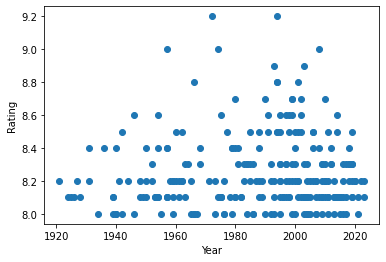

In [2]:
import matplotlib.pyplot as plt

years = [int(movie['year']) for movie in movie_data]
ratings = [movie['rating'] for movie in movie_data]

plt.scatter(years, ratings)
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

# this does not say much, probably more movies were produced in the 20s than before. Highest rated movies were old and gold.

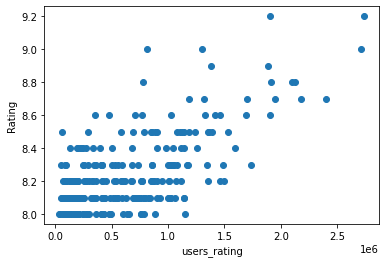

In [3]:

import matplotlib.pyplot as plt

users_rating = [movie['users_rating'] for movie in movie_data]
ratings = [movie['rating'] for movie in movie_data]

plt.scatter(users_rating, ratings)
plt.xlabel('users_rating')
plt.ylabel('Rating')
plt.show()

# This could indicate that movies that have data point in upper right corner have high credibility of ratings